# Visualizations of data from project_code_FINAL.ipynb

In [111]:
#Initial set-up

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

#return every shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

cor_dir = "/Users/Benjamin's/Documents/Data_Science/bnaismith_LING2340_project/"

bigram_df = pd.read_pickle(cor_dir + 'bigram_df.pkl')
combo_df = pd.read_pickle(cor_dir + 'combo_df.pkl')
levels_df = pd.read_pickle(cor_dir + 'levels_df.pkl')

### Reminder of overall breakdown

In [48]:
levels_df

,unigram_toks,unigram_types,bigram_toks,bigram_types
Level 3,288294,11993,288293,82411
Level 4,1196274,23313,1196273,237014
Level 5,1064445,23753,1064444,237605
Total,2549012,39272,2549011,432880


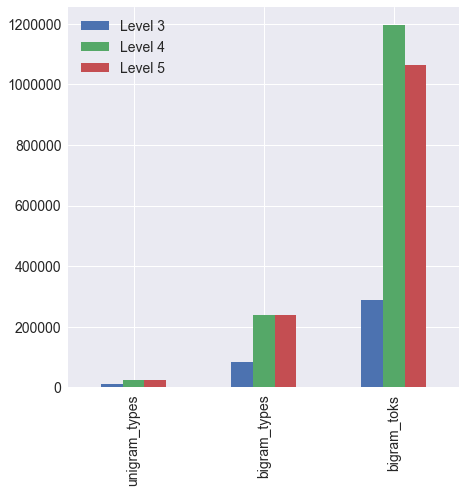

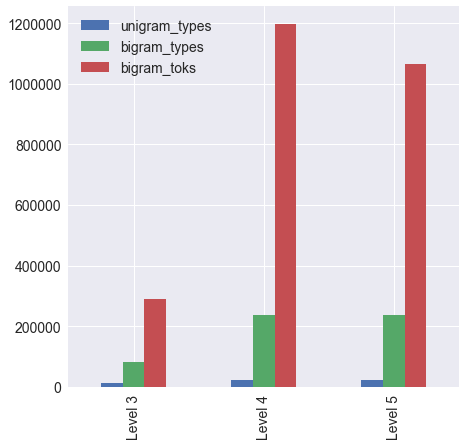

In [119]:
plot = levels_df[['unigram_types','bigram_types','bigram_toks']].iloc[:3,:].T.plot(kind='bar', figsize=(7,7))
plot.figure

plot = levels_df[['unigram_types','bigram_types','bigram_toks']].iloc[:3,:].plot(kind='bar', figsize=(7,7))
plot.figure

### Let's see a few 'Top 20' lists

In [120]:
#Starting with class tokens

top_bigram_toks = bigram_df.sort_values('tokens', ascending = False).reset_index(drop=True)
top_bigram_toks.index += 1 #lists look better starting at 1
top_bigram_toks.head(20)

#not very helpful - all punctuation and stop words

,bigram,tokens,MI,per_million,lv3_norm_toks,lv4_norm_toks,lv5_norm_toks,level_3,level_4,level_5,lv3_per_M,lv4_per_M,lv5_per_M
1,"[in, the]",11172,2.38,4382.88,2009,3939,5222,17.98%,35.27%,46.75%,788.15,1545.31,2048.64
2,"[., the]",9865,0.77,3870.13,1854,4241,3783,18.80%,43.00%,38.35%,727.34,1663.78,1484.11
3,"[,, and]",9818,1.71,3851.69,1690,4525,3602,17.22%,46.09%,36.69%,663.00,1775.20,1413.10
4,"[of, the]",9054,2.03,3551.97,1423,3369,4261,15.72%,37.21%,47.07%,558.26,1321.69,1671.63
5,"[., in]",8602,1.68,3374.64,1408,3526,3668,16.38%,41.00%,42.64%,552.37,1383.28,1438.99
6,"[,, i]",8278,2.40,3247.53,2019,3412,2846,24.40%,41.23%,34.38%,792.07,1338.56,1116.51
7,"[,, the]",8201,0.64,3217.33,1292,3045,3861,15.76%,37.14%,47.09%,506.86,1194.58,1514.71
8,"[., i]",7442,2.11,2919.56,2169,2954,2326,29.15%,39.70%,31.27%,850.92,1158.88,912.51
9,"[it, is]",6772,4.19,2656.72,1222,2705,2844,18.05%,39.95%,42.00%,479.40,1061.20,1115.73
10,"[., it]",5154,2.11,2021.96,971,2219,1965,18.85%,43.06%,38.13%,380.93,870.53,770.89


In [121]:
#Then the (presumably) more predictive MI

top_bigram_MI = bigram_df.sort_values('MI', ascending = False).reset_index(drop=True)
top_bigram_MI.index += 1
top_bigram_MI[top_bigram_MI['tokens'] >= 30].head(20) #set min number to get rid of random names and rarities

,bigram,tokens,MI,per_million,lv3_norm_toks,lv4_norm_toks,lv5_norm_toks,level_3,level_4,level_5,lv3_per_M,lv4_per_M,lv5_per_M
4949,"[los, angeles]",34,15.95,13.34,4,8,20,14.63%,23.92%,61.44%,1.57,3.14,7.85
6097,"[hong, kong]",50,15.36,19.62,8,39,1,17.81%,78.51%,3.68%,3.14,15.30,0.39
6485,"[undergrad, grill]",45,15.19,17.65,2,42,0,5.81%,94.51%,-0.32%,0.78,16.48,0.00
6987,"[niagara, falls]",37,15.00,14.52,4,32,0,11.22%,89.11%,-0.32%,1.57,12.55,0.00
6988,"[el, nino]",60,15.00,23.54,3,-3,59,5.81%,-5.49%,99.68%,1.18,-1.18,23.15
7072,"[san, francisco]",45,14.96,17.65,2,25,16,5.81%,56.73%,37.45%,0.78,9.81,6.28
7437,"[carbon, dioxide]",61,14.82,23.93,5,6,48,9.09%,10.91%,80.01%,1.96,2.35,18.83
9741,"[southwestern, pennsylvania]",33,14.04,12.95,34,-1,0,105.81%,-5.49%,-0.32%,13.34,-0.39,0.00
9747,"[frying, pan]",49,14.04,19.22,50,-1,0,103.77%,-3.45%,-0.32%,19.62,-0.39,0.00
10794,"[alarm, clock]",47,13.73,18.44,39,0,7,84.53%,-1.23%,16.70%,15.30,0.00,2.75


In [122]:
#but a lot of compound nouns, so maybe a 'medium' MI of 10 will have more collocations

top_bigram_MI.loc[(top_bigram_MI['tokens'] >= 30) & (top_bigram_MI['MI'] <= 10), :].head(20)

#seems like this is a useful approach but 'best' MI range needs exploring with human judgments

,bigram,tokens,MI,per_million,lv3_norm_toks,lv4_norm_toks,lv5_norm_toks,level_3,level_4,level_5,lv3_per_M,lv4_per_M,lv5_per_M
36882,"[unemployment, rate]",36,9.99,14.12,2,22,11,5.81%,61.18%,33.01%,0.78,8.63,4.32
37302,"[south, korea]",196,9.95,76.89,16,33,146,8.36%,16.96%,74.68%,6.28,12.95,57.28
38085,"[physical, activity]",93,9.90,36.48,7,56,28,7.96%,61.18%,30.86%,2.75,21.97,10.98
38232,"[tea, bowl]",52,9.88,20.40,3,49,0,5.81%,94.51%,-0.32%,1.18,19.22,0.00
38265,"[pay, attention]",117,9.88,45.90,19,58,38,16.92%,50.07%,33.01%,7.45,22.75,14.91
38279,"[eating, habits]",147,9.88,57.67,8,100,37,5.81%,68.66%,25.53%,3.14,39.23,14.52
38436,"[years, ago]",420,9.86,164.77,62,132,224,14.86%,31.66%,53.49%,24.32,51.78,87.88
38914,"[public, transportation]",201,9.82,78.85,36,53,110,18.25%,26.85%,54.90%,14.12,20.79,43.15
39100,"[wake, up]",113,9.79,44.33,32,46,33,28.82%,41.42%,29.77%,12.55,18.05,12.95
39145,"[chinese, calendar]",37,9.79,14.52,2,34,0,5.81%,94.51%,-0.32%,0.78,13.34,0.00


In [123]:
#The most frequent (normalized) tokens at each level
   
top_bigram_level3 = bigram_df.sort_values('lv3_norm_toks', ascending = False).reset_index(drop=True)
top_bigram_level3.index += 1
top_bigram_level3.head(10)

top_bigram_level4 = bigram_df.sort_values('lv4_norm_toks', ascending = False).reset_index(drop=True)
top_bigram_level4.index += 1
top_bigram_level4.head(10)

top_bigram_level5 = bigram_df.sort_values('lv5_norm_toks', ascending = False).reset_index(drop=True)
top_bigram_level5.index += 1
top_bigram_level5.head(10)

,bigram,tokens,MI,per_million,lv3_norm_toks,lv4_norm_toks,lv5_norm_toks,level_3,level_4,level_5,lv3_per_M,lv4_per_M,lv5_per_M
1,"[., i]",7442,2.11,2919.56,2169,2954,2326,29.15%,39.70%,31.27%,850.92,1158.88,912.51
2,"[,, i]",8278,2.40,3247.53,2019,3412,2846,24.40%,41.23%,34.38%,792.07,1338.56,1116.51
3,"[in, the]",11172,2.38,4382.88,2009,3939,5222,17.98%,35.27%,46.75%,788.15,1545.31,2048.64
4,"[., the]",9865,0.77,3870.13,1854,4241,3783,18.80%,43.00%,38.35%,727.34,1663.78,1484.11
5,"[,, and]",9818,1.71,3851.69,1690,4525,3602,17.22%,46.09%,36.69%,663.00,1775.20,1413.10
6,"[of, the]",9054,2.03,3551.97,1423,3369,4261,15.72%,37.21%,47.07%,558.26,1321.69,1671.63
7,"[., in]",8602,1.68,3374.64,1408,3526,3668,16.38%,41.00%,42.64%,552.37,1383.28,1438.99
8,"[,, the]",8201,0.64,3217.33,1292,3045,3861,15.76%,37.14%,47.09%,506.86,1194.58,1514.71
9,"[it, is]",6772,4.19,2656.72,1222,2705,2844,18.05%,39.95%,42.00%,479.40,1061.20,1115.73
10,"[there, are]",5083,5.99,1994.11,1053,2227,1802,20.72%,43.81%,35.46%,413.10,873.67,706.94


,bigram,tokens,MI,per_million,lv3_norm_toks,lv4_norm_toks,lv5_norm_toks,level_3,level_4,level_5,lv3_per_M,lv4_per_M,lv5_per_M
1,"[,, and]",9818,1.71,3851.69,1690,4525,3602,17.22%,46.09%,36.69%,663.00,1775.20,1413.10
2,"[., the]",9865,0.77,3870.13,1854,4241,3783,18.80%,43.00%,38.35%,727.34,1663.78,1484.11
3,"[in, the]",11172,2.38,4382.88,2009,3939,5222,17.98%,35.27%,46.75%,788.15,1545.31,2048.64
4,"[., in]",8602,1.68,3374.64,1408,3526,3668,16.38%,41.00%,42.64%,552.37,1383.28,1438.99
5,"[,, i]",8278,2.40,3247.53,2019,3412,2846,24.40%,41.23%,34.38%,792.07,1338.56,1116.51
6,"[of, the]",9054,2.03,3551.97,1423,3369,4261,15.72%,37.21%,47.07%,558.26,1321.69,1671.63
7,"[,, the]",8201,0.64,3217.33,1292,3045,3861,15.76%,37.14%,47.09%,506.86,1194.58,1514.71
8,"[., i]",7442,2.11,2919.56,2169,2954,2326,29.15%,39.70%,31.27%,850.92,1158.88,912.51
9,"[it, is]",6772,4.19,2656.72,1222,2705,2844,18.05%,39.95%,42.00%,479.40,1061.20,1115.73
10,"[,, you]",4668,2.01,1831.30,992,2365,1309,21.26%,50.68%,28.06%,389.17,927.81,513.53


,bigram,tokens,MI,per_million,lv3_norm_toks,lv4_norm_toks,lv5_norm_toks,level_3,level_4,level_5,lv3_per_M,lv4_per_M,lv5_per_M
1,"[in, the]",11172,2.38,4382.88,2009,3939,5222,17.98%,35.27%,46.75%,788.15,1545.31,2048.64
2,"[of, the]",9054,2.03,3551.97,1423,3369,4261,15.72%,37.21%,47.07%,558.26,1321.69,1671.63
3,"[,, the]",8201,0.64,3217.33,1292,3045,3861,15.76%,37.14%,47.09%,506.86,1194.58,1514.71
4,"[., the]",9865,0.77,3870.13,1854,4241,3783,18.80%,43.00%,38.35%,727.34,1663.78,1484.11
5,"[., in]",8602,1.68,3374.64,1408,3526,3668,16.38%,41.00%,42.64%,552.37,1383.28,1438.99
6,"[,, and]",9818,1.71,3851.69,1690,4525,3602,17.22%,46.09%,36.69%,663.00,1775.20,1413.10
7,"[,, i]",8278,2.40,3247.53,2019,3412,2846,24.40%,41.23%,34.38%,792.07,1338.56,1116.51
8,"[it, is]",6772,4.19,2656.72,1222,2705,2844,18.05%,39.95%,42.00%,479.40,1061.20,1115.73
9,"[., i]",7442,2.11,2919.56,2169,2954,2326,29.15%,39.70%,31.27%,850.92,1158.88,912.51
10,"[to, the]",4573,0.60,1794.03,737,1735,2100,16.13%,37.94%,45.93%,289.13,680.66,823.85


In [124]:
#And the bigrams most indicative of level
   
top_lv3_percent = bigram_df.sort_values('level_3', ascending = False).reset_index(drop=True)
top_lv3_percent.index += 1
top_lv3_percent.loc[(top_lv3_percent['tokens'] >= 5) & (top_lv3_percent['MI'] >= 4), :].reset_index(drop=True).head(20) #minimum of 10 tokens and 4 MI

top_lv4_percent = bigram_df.sort_values('level_4', ascending = False).reset_index(drop=True)
top_lv4_percent.index += 1
top_lv4_percent.loc[(top_lv4_percent['tokens'] >= 5) & (top_lv4_percent['MI'] >= 4), :].reset_index(drop=True).head(20) #minimum of 10 tokens

top_lv5_percent = bigram_df.sort_values('level_5', ascending = False).reset_index(drop=True)
top_lv5_percent.index += 1
top_lv5_percent.loc[(top_lv5_percent['tokens'] >= 5) & (top_lv5_percent['MI'] >= 4), :].reset_index(drop=True).head(20) #minimum of 10 tokens

,bigram,tokens,MI,per_million,lv3_norm_toks,lv4_norm_toks,lv5_norm_toks,level_3,level_4,level_5,lv3_per_M,lv4_per_M,lv5_per_M
0,"[few, disadvantages]",17,8.04,6.67,16,0,0,99.93%,0.40%,-0.32%,6.28,0.0,0.0
1,"[overcome, challenges]",17,11.34,6.67,16,0,0,99.93%,0.40%,-0.32%,6.28,0.0,0.0
2,"[know, anyone]",17,5.89,6.67,16,0,0,99.93%,-5.49%,5.56%,6.28,0.0,0.0
3,"[certainly, has]",17,6.04,6.67,16,0,0,99.93%,-5.49%,5.56%,6.28,0.0,0.0
4,"[occurs, at]",17,6.30,6.67,16,0,0,99.93%,-5.49%,5.56%,6.28,0.0,0.0
5,"[front, side]",17,7.16,6.67,16,0,0,99.93%,-5.49%,5.56%,6.28,0.0,0.0
6,"[enter, key]",50,10.25,19.62,49,0,0,99.81%,0.51%,-0.32%,19.22,0.0,0.0
7,"[world, designed]",16,7.36,6.28,15,0,0,99.56%,0.76%,-0.32%,5.88,0.0,0.0
8,"[lay, their]",16,6.18,6.28,15,0,0,99.56%,-5.49%,5.93%,5.88,0.0,0.0
9,"[challenges, every]",16,7.26,6.28,15,0,0,99.56%,-5.49%,5.93%,5.88,0.0,0.0


,bigram,tokens,MI,per_million,lv3_norm_toks,lv4_norm_toks,lv5_norm_toks,level_3,level_4,level_5,lv3_per_M,lv4_per_M,lv5_per_M
0,"[sleep, environment]",9,4.90,3.53,0,8,0,5.81%,94.51%,-0.32%,0.00,3.14,0.0
1,"[before, bedtime]",9,8.88,3.53,0,8,0,5.81%,94.51%,-0.32%,0.00,3.14,0.0
2,"[warm, milk]",9,8.20,3.53,0,8,0,5.81%,94.51%,-0.32%,0.00,3.14,0.0
3,"[do, housekeeping]",6,7.46,2.35,0,5,0,5.81%,94.51%,-0.32%,0.00,1.96,0.0
4,"[unhappy, because]",6,4.40,2.35,0,5,0,5.81%,94.51%,-0.32%,0.00,1.96,0.0
5,"[your, umbrella]",8,6.02,3.14,0,7,0,5.81%,94.51%,-0.32%,0.00,2.75,0.0
6,"[parents, disapprove]",6,9.30,2.35,0,5,0,5.81%,94.51%,-0.32%,0.00,1.96,0.0
7,"[love, jim]",10,6.97,3.92,0,9,0,5.81%,94.51%,-0.32%,0.00,3.53,0.0
8,"[convince, your]",10,5.54,3.92,0,9,0,5.81%,94.51%,-0.32%,0.00,3.53,0.0
9,"[your, boyfriend]",20,6.73,7.85,1,18,0,5.81%,94.51%,-0.32%,0.39,7.06,0.0


,bigram,tokens,MI,per_million,lv3_norm_toks,lv4_norm_toks,lv5_norm_toks,level_3,level_4,level_5,lv3_per_M,lv4_per_M,lv5_per_M
0,"[u.s., army]",5,6.50,1.96,0,0,4,5.81%,-5.49%,99.68%,0.00,0.00,1.57
1,"[by, scams]",5,6.89,1.96,0,0,4,5.81%,-5.49%,99.68%,0.00,0.00,1.57
2,"[active, euthanasia]",8,8.24,3.14,0,0,7,5.81%,-5.49%,99.68%,0.00,0.00,2.75
3,"[(, euthanasia]",10,4.21,3.92,0,0,9,5.81%,-5.49%,99.68%,0.00,0.00,3.53
4,"[``, fanthasia]",5,9.67,1.96,0,0,4,5.81%,-5.49%,99.68%,0.00,0.00,1.57
5,"[fanthasia, '']",5,9.47,1.96,0,0,4,5.81%,-5.49%,99.68%,0.00,0.00,1.57
6,"[a, coma]",5,4.35,1.96,0,0,4,5.81%,-5.49%,99.68%,0.00,0.00,1.57
7,"[brain, dead]",7,8.69,2.75,0,0,6,5.81%,-5.49%,99.68%,0.00,0.00,2.35
8,"[be, killed]",15,4.45,5.88,0,0,14,5.81%,-5.49%,99.68%,0.00,0.00,5.49
9,"[terminally, ill]",27,15.15,10.59,1,-1,26,5.81%,-5.49%,99.68%,0.39,-0.39,10.20


#### The above tables seem to point to certain tasks rather than overall level

### Machine Learning
- predict level_id based on
    - average bigram MI of a text (linear regression)
    - words used in a text ('bag-of-words' approach)
    

#### Average Bigram MI vs Level
    

In [153]:
X = combo_df[['avg_bigram_MI']]  #dataframe with only one column. Uppercase X. 
y = combo_df['level_id'] #series

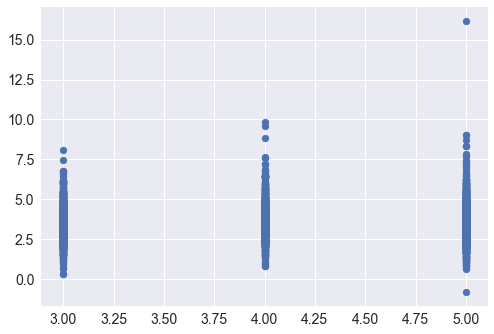

In [159]:
plt.scatter(combo_df['level_id'], combo_df['avg_bigram_MI'])
plt.show()

#I don't think I need to run an ANOVA to see a lack of significance...

In [160]:
#split data with sklearn. Randomize on same seed. 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

In [161]:
#Check lengths of X and y are equal
len(X_train)
len(X_test)
len(y_train)
len(y_test)

8764

2192

8764

2192

In [162]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [163]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [164]:
X_test[:5]    # test set, real level id
y_test[:5]    # test set, average bigram MI
y_pred[:5]    # level id predicted by bigram MI
                 # <-- hopefully not too far away from real numbers! 

,avg_bigram_MI
answer_id,
34569,4.831667
18087,4.777188
45452,2.795844
22548,2.484167
26945,3.417654


answer_id
34569    4
18087    5
45452    4
22548    3
26945    4
Name: level_id, dtype: int64

array([ 4.15406855,  4.1523713 ,  4.09064439,  4.08093437,  4.11001631])

In [165]:
#Hmmm, not much difference between the different predicted results - everyone is level 4 according to this...

### Plotting data and prediction
1. On training set
2. On test set

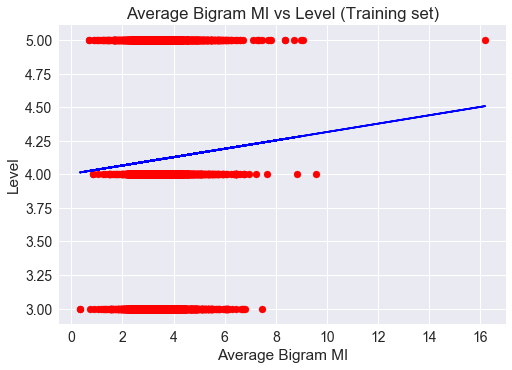

In [167]:
plt.gcf().clear() #clear previous plots
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Average Bigram MI vs Level (Training set)')
plt.xlabel('Average Bigram MI')
plt.ylabel('Level')
plt.show()

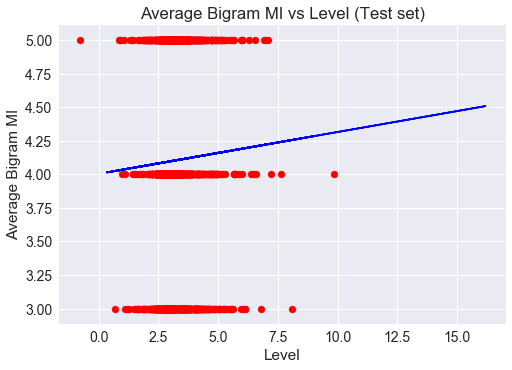

In [168]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Average Bigram MI vs Level (Test set)')
plt.xlabel('Level')
plt.ylabel('Average Bigram MI')
plt.show()

In [152]:
# How about someone with average MI of 3, 8, 15?
newdf = pd.DataFrame({'avg_MI':[3, 8, 15]})
newdf
regressor.predict(newdf)

,avg_MI
0,3
1,8
2,15


array([ 3.24480381,  3.41059888,  3.64271198])

Not very successful! Will consider why.

#### Words (unigrams) used vs Level
    

In [93]:
X = combo_df['text']
y = combo_df['level_id']

In [94]:
#split data with sklearn. Randomize on same seed. 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

In [95]:
len(X_train)
len(X_test)
len(y_train)
len(y_test)

10161

2541

10161

2541

In [96]:
X_train.head()
y_train.head()

answer_id
1374     We have been tending to forget to enjoy food b...
7821     Everyone is considered to be a student in scho...
2256     She organized this paragragh by time.\r\r\r\nT...
29348     Recently, the economy is not stable and that ...
6533     First of all, I used to not clean my room for ...
Name: text, dtype: object

answer_id
1374     5
7821     4
2256     5
29348    5
6533     4
Name: level_id, dtype: int64

In [97]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score

plmodel = make_pipeline( TfidfVectorizer(max_features=1500, stop_words=None), MultinomialNB() )

plmodel.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1500, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [100]:
y_pred = plmodel.predict(X_test)

accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
cm

0.69027941755214484

array([[424, 179,  69],
       [ 77, 777, 123],
       [ 78, 261, 553]])

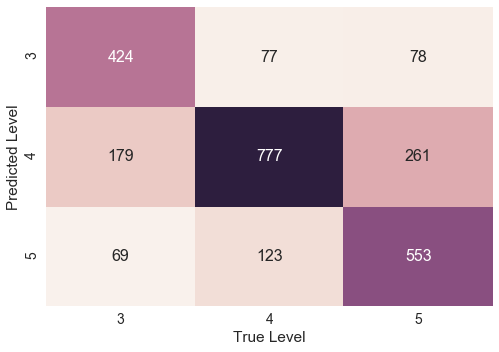

In [102]:
# confusion matrix is np.array(), and does not have label info.
# labels should be deduced unique values.  

plt.gcf().clear() #clear previous plots

labels = list(np.unique(y_test))  # already sorted

sns.set(font_scale=1.4) #for label size
sns.heatmap(cm.T, annot=True, fmt='d', cbar=False, annot_kws={"size": 16},
            xticklabels=labels, yticklabels=labels)
plt.xlabel('True Level')
plt.ylabel('Predicted Level')
plt.show()

#### Pretty good accuracy at 69% although this may have to do with the lexical sets of the prompts. Interestingly, it somewhat underpredicts level 5 (thinking it's level 4).